In [44]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import IPython.display as ipd
import subprocess

In [45]:
video_path = r"C:\Users\sahil\OneDrive\Desktop\Sahil\Projects\IIT_ETHIOS\basic_vid_process\50_data\vid1.mp4"
ipd.display(ipd.Video(video_path, embed=True))
subprocess.run(['start', video_path], shell=True)

CompletedProcess(args=['start', 'C:\\Users\\sahil\\OneDrive\\Desktop\\Sahil\\Projects\\IIT_ETHIOS\\basic_vid_process\\50_data\\vid1.mp4'], returncode=0)

In [46]:
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    fps = cap.get(cv2.CAP_PROP_FPS)
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Video properties: Height {height}, Width {width}, FPS {fps:.2f}, Frame Count {n_frames}")
cap.release()


Video properties: Height 1280.0, Width 720.0, FPS 30.00, Frame Count 44


In [47]:
def display_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis('off')
    plt.show()


In [48]:
def rotate_90(img):
    return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

  7%|█████▋                                                                             | 3/44 [00:00<00:01, 25.58it/s]

Processing frame: 0
Read status: True
Processing frame: 1
Read status: True
Processing frame: 2
Read status: True
Processing frame: 3
Read status: True
Processing frame: 4
Read status: True
Processing frame: 5
Read status: True
Processing frame: 6
Read status: True
Processing frame: 7
Read status: True
Processing frame: 8
Read status: True
Processing frame: 9


 45%|█████████████████████████████████████▎                                            | 20/44 [00:00<00:00, 70.88it/s]

Read status: True
Processing frame: 10
Read status: True
Processing frame: 11
Read status: True
Processing frame: 12
Read status: True
Processing frame: 13
Read status: True
Processing frame: 14
Read status: True
Processing frame: 15
Read status: True
Processing frame: 16
Read status: True
Processing frame: 17
Read status: True
Processing frame: 18
Read status: True
Processing frame: 19
Read status: True
Processing frame: 20
Read status: True
Processing frame: 21
Read status: True
Processing frame: 22
Read status: True
Processing frame: 23
Read status: True
Processing frame: 24
Read status: True
Processing frame: 25
Read status: True
Processing frame: 26
Read status: True
Processing frame: 27
Read status: True
Processing frame: 28
Read status: True
Processing frame: 29
Read status: True
Processing frame: 30
Read status: True


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 81.45it/s]


Processing frame: 31
Read status: True
Processing frame: 32
Read status: True
Processing frame: 33
Read status: True
Processing frame: 34
Read status: True
Processing frame: 35
Read status: True
Processing frame: 36
Read status: True
Processing frame: 37
Read status: True
Processing frame: 38
Read status: True
Processing frame: 39
Read status: True
Processing frame: 40
Read status: True
Processing frame: 41
Read status: True
Processing frame: 42
Read status: True
Processing frame: 43
Read status: True


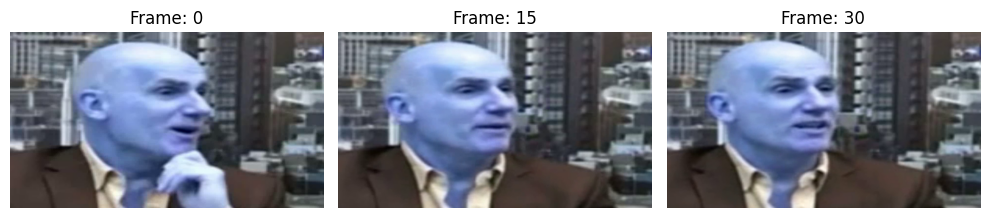

In [63]:
cap = cv2.VideoCapture(video_path)
fig, axs = plt.subplots(1, 3, figsize=(10, 7))
axs = axs.flatten()

img_idx = 0
for frame in tqdm(range(n_frames)):
    print(f"Processing frame: {frame}") 
    ret, img = cap.read()
    print(f"Read status: {ret}")  
    
    if not ret:
        print(f"Error: Frame {frame} could not be read.")
        break
    
    img = rotate_90(img)
    
    if frame % 15 == 0: 
        if img_idx < len(axs):
            axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[img_idx].set_title(f"Frame: {frame}")
            axs[img_idx].axis('off')
            img_idx += 1
        else:
            break

plt.tight_layout()
plt.show()
cap.release()


In [64]:
#Annotations
labels= pd.read_csv(r"C:\Users\sahil\OneDrive\Desktop\Sahil\Projects\IIT_ETHIOS\basic_vid_process\50_data\youtube_faces_with_keypoints_full.csv")
labels.head()

vid_labels= (labels.query('video_id== "Connie_Chung_2"').reset_index(drop=True).copy())

vid_labels['image_height'].value_counts()

image_height
208    1
Name: count, dtype: int64

In [65]:
cap = cv2.VideoCapture(video_path)
for frame in range(n_frames):
    ret, img = cap.read()
    if not ret:
        break
    if frame == 22:
        img = rotate_90(img)
        break
cap.release()


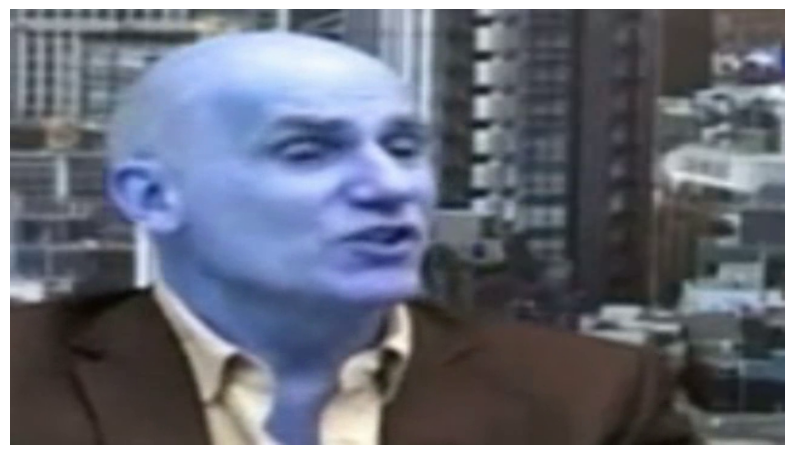

In [66]:
frame_labels = vid_labels.query('video_duration==100')
for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int (d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int (d['box2d.y2'])
    cv2.rectangle(img,pt1,pt2, (0,0,255),3)
display_img(img)

In [67]:
def add_anot(img, duration, vid_labels):
    max_duration = vid_labels.query('video_duration <= @duration')['video_duration'].max()
    frame_labels = vid_labels.query('video_duration == @max_duration')
    for i, d in frame_labels.iterrows():
        pt1 = (int(d['box2d.x1']), int(d['box2d.y1']))
        pt2 = (int(d['box2d.x2']), int(d['box2d.y2']))
        cv2.rectangle(img, pt1, pt2, (0, 0, 255), 3)
    return img

In [73]:
for duration in tqdm(range(1, n_frames + 1), total=n_frames):
    ret, img = cap.read()
    if not ret:
        break
    img = rotate_90(img) 
    img = add_anot(img, duration, vid_labels)
    out.write(img)


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 77.64it/s]


In [71]:
import os
print(os.path.exists(video_path))


True


In [72]:
cap = cv2.VideoCapture(video_path)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total frames: {n_frames}")


Total frames: 44
